In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('../data/gene_expression.csv')

In [79]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

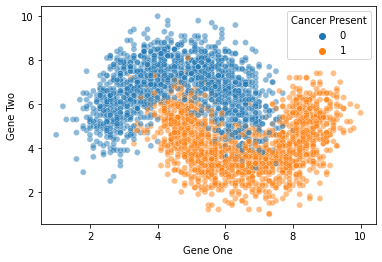

In [80]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present',alpha=0.5)

(3.0, 6.0)

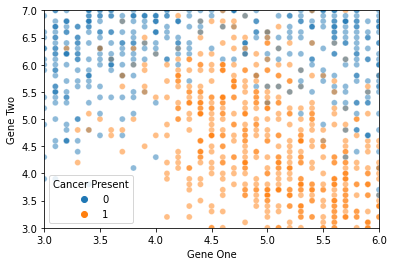

In [81]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present',alpha=0.5)
plt.ylim(3,7)
plt.xlim(3,6)

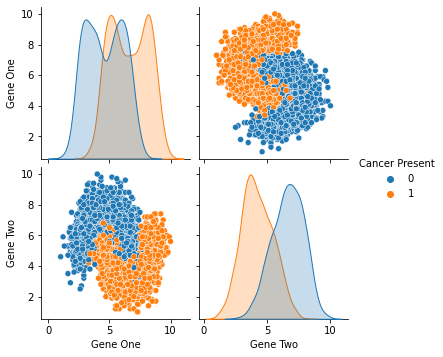

In [82]:
sns.pairplot(data=df, hue='Cancer Present')

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [84]:
X = df.drop('Cancer Present',axis=1)

In [85]:
y = df['Cancer Present']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
scaler = StandardScaler()

In [88]:
scaled_x_train = scaler.fit_transform(X_train)

In [89]:
scaled_x_test = scaler.transform(X_test)

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
model = KNeighborsClassifier(n_neighbors=1)

In [92]:
model.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [93]:
y_pred = model.predict(scaled_x_test)

In [94]:
from sklearn.metrics import confusion_matrix,classification_report

In [95]:
confusion_matrix(y_test, y_pred)

array([[420,  50],
       [ 47, 383]], dtype=int64)

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [97]:
from sklearn.metrics import accuracy_score

In [98]:
test_error = []

for a in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=a)
    knn_model.fit(scaled_x_train,y_train)

    y_pred_t = knn_model.predict(scaled_x_test)

    error = 1 - accuracy_score(y_test,y_pred_t)

    test_error.append(error)


In [99]:
test_error

[0.10777777777777775,
 0.09999999999999998,
 0.07444444444444442,
 0.07666666666666666,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05666666666666664,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782]

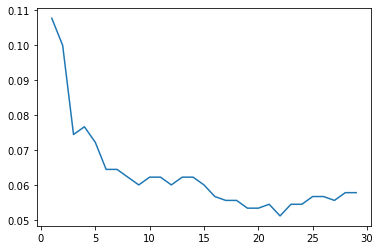

In [100]:
plt.plot(range(1,30), test_error)

In [101]:
scaler = StandardScaler()

In [102]:
knn = KNeighborsClassifier()

In [103]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [104]:
operations = [('sclaer',scaler),('knn',knn)]

In [105]:
from sklearn.pipeline import Pipeline

In [106]:
pipe = Pipeline(operations)

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
k_values = list(range(1,20))

In [109]:
param_grid = {'knn__n_neighbors':k_values}

In [110]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5, scoring='accuracy')

In [111]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sclaer', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [112]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('sclaer', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'sclaer': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'sclaer__copy': True,
 'sclaer__with_mean': True,
 'sclaer__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [113]:
full_pred = full_cv_classifier.predict(X_test)

In [114]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [115]:
############################################################

In [116]:
df = pd.read_csv('../data/sonar.all-data.csv')

<AxesSubplot:>

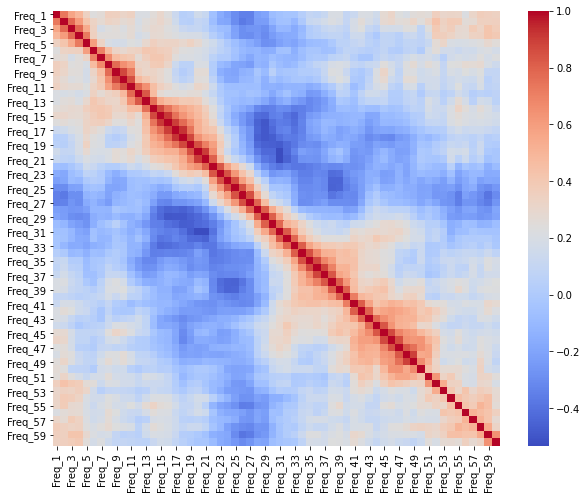

In [117]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm')

In [118]:
df['Target']= df['Label'].map({'R':0,'M':1})

In [119]:
df['Target']

0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: Target, Length: 208, dtype: int64

In [120]:
np.abs(df.corr()['Target']).sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

In [121]:
X = df.drop(['Target','Label'],axis=1)

In [122]:
y = df['Label']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [124]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [125]:
operations = [('scaler',scaler), ('knn', knn)]

In [126]:
pipe = Pipeline(operations)

In [127]:
k_valaues = list(range(1,30))

In [128]:
param_grid = {'knn__n_neighbors':k_valaues}

In [129]:
full_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [130]:
full_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [131]:
full_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

<AxesSubplot:>

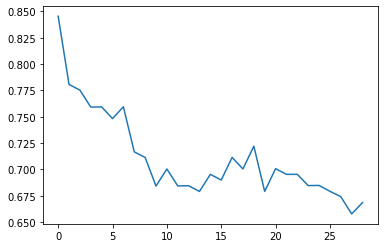

In [132]:
pd.DataFrame(full_classifier.cv_results_)['mean_test_score'].plot()

In [134]:
y_pred = full_classifier.predict(X_test)

In [135]:
confusion_matrix(y_test,y_pred)

array([[12,  1],
       [ 1,  7]], dtype=int64)

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

